In [1]:
#Import dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import date from datetime
from datetime import date

In [3]:
#Import Twitter Keys
from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

In [4]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [21]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
News_Channels = ["BBC","CBS","CNN","FOX","NYTIMES"]

In [23]:
#Getting News tweets from News_Channels
All_News_Data = []

for news in News_Channels:
    for page in range(1, 6):
        All_tweet = api.user_timeline(news,page=page)
        for tweet in All_tweet:
            All_News_Data.append(tweet)  

In [24]:
#Looping through all the tweets and running vader analysis
BBC_compound = []
CBS_compound = []
CNN_compound = []
FOX_compound = []
NYT_compound = []

for data in All_News_Data:
    sname = data["user"]["screen_name"]
    if (sname == "BBC"):
# Run Vader Analysis on each BBC tweet
        BBC_results = analyzer.polarity_scores(data["text"])
        BBC_compound.append(round(BBC_results["compound"],1))
    elif (sname == "CBS"):
# Run Vader Analysis on each CBS tweet
        CBS_results = analyzer.polarity_scores(data["text"])
        CBS_compound.append(round(CBS_results["compound"],1))
    elif (sname == "CNN"):
# Run Vader Analysis on each CNN tweet
        CNN_results = analyzer.polarity_scores(data["text"])
        CNN_compound.append(round(CNN_results["compound"],1))
    elif (sname == "fox"):
# Run Vader Analysis on each FOX tweet
        FOX_results = analyzer.polarity_scores(data["text"])
        FOX_compound.append(round(FOX_results["compound"],1))
    else:
# Run Vader Analysis on each New York Times tweet
        NYT_results = analyzer.polarity_scores(data["text"])
        NYT_compound.append(round(NYT_results["compound"],1))     

In [25]:
#Creating dictionary with compound sentiments scores
Sentiments = {"BBC_compound" : BBC_compound,
              "CBS_compound" : CBS_compound,
              "CNN_compound" : CNN_compound,
              "FOX_compound" : FOX_compound,
              "NYT_compound" : NYT_compound}

In [26]:
#Creating dataframe of sentiments
Sentiments_df = pd.DataFrame(Sentiments)
Sentiments_df.head()

,BBC_compound,CBS_compound,CNN_compound,FOX_compound,NYT_compound
0,-0.3,0.0,0.0,0.0,0.7
1,0.0,0.8,-0.1,-0.2,-0.8
2,0.5,0.6,0.7,0.7,-0.4
3,-0.1,0.2,0.1,0.7,-0.8
4,0.0,0.4,-0.7,-0.6,0.9


In [28]:
#Adding the sequence in which the tweets were added 100 being the order of the most recent ones
Sentiments_df["Tweets_ago"] = np.arange(100,0,-1)
Sentiments_df.head()

,BBC_compound,CBS_compound,CNN_compound,FOX_compound,NYT_compound,Tweets_ago
0,-0.3,0.0,0.0,0.0,0.7,100
1,0.0,0.8,-0.1,-0.2,-0.8,99
2,0.5,0.6,0.7,0.7,-0.4,98
3,-0.1,0.2,0.1,0.7,-0.8,97
4,0.0,0.4,-0.7,-0.6,0.9,96


In [30]:
#Saving the dataframe to CSV file
Sentiments_df.to_csv("MyFiles/Sentiment_df.csv")

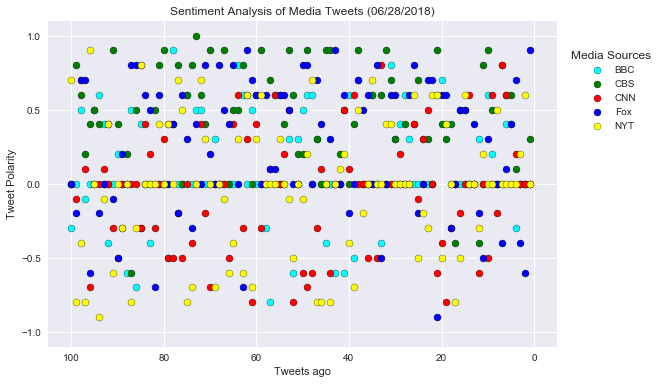

In [31]:
#Plotting the scatter plots
fig,ax=plt.subplots()
ax.scatter(Sentiments_df["Tweets_ago"],Sentiments_df["BBC_compound"],color="aqua",edgecolor="black",label="BBC")
ax.scatter(Sentiments_df["Tweets_ago"],Sentiments_df["CBS_compound"],color="green",edgecolor="black",label="CBS")
ax.scatter(Sentiments_df["Tweets_ago"],Sentiments_df["CNN_compound"],color="red",edgecolor="black",label="CNN")
ax.scatter(Sentiments_df["Tweets_ago"],Sentiments_df["FOX_compound"],color="blue",edgecolor="black",label="Fox")
ax.scatter(Sentiments_df["Tweets_ago"],Sentiments_df["NYT_compound"],color="yellow",edgecolor="black",label="NYT")
plt.legend(title="Media Sources",loc=(1.02,.65))
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({date.today().strftime('%m/%d/%Y')})")
plt.yticks(np.arange(-1,1.5,.5))
plt.xlim(105,-5)
plt.ylim(-1.1,1.1)
sns.set_style("dark")
plt.grid()
plt.tight_layout()
plt.savefig("MyImages/Sentiment Analysis of Media Tweets")
plt.show()

In [32]:
#Calculating the mean of the compound sentiments
Compound_mean = [round(np.mean(BBC_compound),2),round(np.mean(CBS_compound),2),
                 round(np.mean(CNN_compound),2),round(np.mean(FOX_compound),2),
                round(np.mean(NYT_compound),2)]

In [33]:
#Creating the Dataframe of the mean of the compound sentiments
Sentiments_mean_df = pd.DataFrame(News_Channels,Compound_mean)
Sentiments_mean_df = Sentiments_mean_df.reset_index()
Sentiments_mean_df = Sentiments_mean_df.rename(columns={0:"News_Channels","index":"Sentiments"})
Sentiments_mean_df

,Sentiments,News_Channels
0,0.13,BBC
1,0.36,CBS
2,-0.04,CNN
3,0.24,FOX
4,-0.02,NYTIMES


In [34]:
#Saving the dataframe to CSV file
Sentiments_mean_df.to_csv("MyFiles/Sentiments_mean_df.csv")

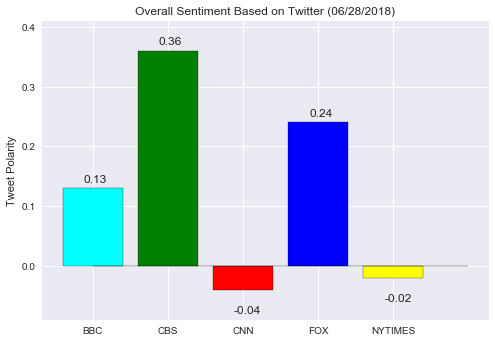

In [35]:
#Plotting the bar graph of the mean sentiment of all the channels
x_ticks = np.arange(len(Sentiments_mean_df["News_Channels"]))
colors = ['aqua', 'green','red', 'blue', 'yellow']

bars = plt.bar(x_ticks,Sentiments_mean_df["Sentiments"],color=colors,edgecolor = "black")

plt.hlines(0, 0, len(x_ticks), alpha=0.2)
plt.xticks(x_ticks,News_Channels)
plt.ylim(Sentiments_mean_df["Sentiments"].min()-0.05,Sentiments_mean_df["Sentiments"].max()+0.05)
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Sentiment Based on Twitter ({date.today().strftime('%m/%d/%Y')})")
sns.set_style("dark")
plt.grid()
for a,b in zip(x_ticks, Sentiments_mean_df["Sentiments"]):
    if (b <0):
        plt.text(a-0.12, b-0.04, str(b))
    else:
        plt.text(a-0.12, b+0.01, str(b))
plt.savefig("MyImages/Overall Sentiment Based on Twitter")
plt.show()